# Packages Loading


In [162]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import graphviz
import numpy as np
import pandas as pd
from matplotlib import cm as cmx
from matplotlib import colors
from matplotlib import pyplot as plt

from data_loading import read_hackathon_data
from data_preprocessing import MetricsProcessor


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reading Data


In [163]:
path = Path("data_config.yaml")
df_hack = read_hackathon_data(path, attach_users=True)
df_hack.head()


,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,expert,user_id
0,10,None,2023-05-06T08:30:38.037Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,save_notebook,None,NaN,None,"[\n {\n ""id"": ""e4836a849dea49f1a753df2274f...",None,False,4
1,17,192.168.1.56,2023-05-06T08:31:35.929Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,e4836a849dea49f1a753df2274fbdbc5,0.0,code,# # Do not forget to check if your notebook lo...,None,False,4
2,18,192.168.1.56,2023-05-06T08:31:35.944Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,create,dbcf462e8f6c4e3a89c0d6d0d083c0b2,0.0,code,None,None,False,4
3,19,192.168.1.56,2023-05-06T08:31:36.049Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,finished_execute,e4836a849dea49f1a753df2274fbdbc5,1.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",False,4
4,41,192.168.1.56,2023-05-06T08:37:46.346Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,code,!ls data/task1,None,False,4


# Initializing of Metrics Processor


In [164]:
processor = MetricsProcessor()


In [33]:
transitions = processor.get_execution_transitions(df_hack[:])
transitions.head()


100%|██████████| 44/44 [02:41<00:00,  3.66s/it]


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,inner_transition,changes
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,e139884774504ae997d7e38e6be6da88,0.0,# # Do not forget to check if your notebook lo...,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,False,[]
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,False,[]
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,False,[]
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,False,[]
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,8fd58da2205544c1a978c43701cd5678,0.0,# # Do not forget to check if your notebook lo...,False,[]


# Transitions Analysis


In [36]:
transitions['change_num'] = transitions.cell_num_to - transitions.cell_num_from
transitions['transition_type'] = transitions.change_num.apply(
    lambda x: 'forward' if x > 0 else ("inner" if x == 0 else 'backward')
)


In [102]:
merge_columns = ['user_id', 'kernel_id', 'expert', 'notebook_name']
transitions_merged = df_hack[merge_columns].drop_duplicates(keep='last').merge(transitions, on='kernel_id')

transitions_merged['task_type'] = transitions_merged.notebook_name.apply(
    lambda x: 1 if 'task1' in x else (2 if "task2" in x else 1)
)
transitions_merged.head()



,user_id,kernel_id,expert,notebook_name,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,inner_transition,changes,change_num,transition_type,task_type
0,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,e4836a849dea49f1a753df2274fbdbc5,0.0,# # Do not forget to check if your notebook lo...,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls data/task1,False,[],1.0,forward,1
1,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls data/task1,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,True,[Move(target_node=ASTNode(type=expression_stat...,0.0,inner,1
2,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,True,[],0.0,inner,1
3,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,"""checking""",True,"[Insert(target_node=IN(type=root), node=('modu...",0.0,inner,1
4,4,eeedb543-cbc3-4e59-8e63-511e29518da4,False,task1.ipynb,cc973487bf764ec49c8636c0f02f886c,0.0,# # Do not forget to check if your notebook lo...,b96452a97f01456883542ea0ac111479,1.0,!ls,False,[],1.0,forward,1


## Transition of different types across different tasks

In [150]:
task_transition_relations = transitions_merged.groupby(
    ["task_type", 'user_id'], as_index=False
) \
    .transition_type.value_counts(normalize=True) \
    .groupby(["task_type", 'transition_type'], as_index=False).proportion.mean()

task_transition_relations


,task_type,transition_type,proportion
0,1,backward,0.073439
1,1,forward,0.295939
2,1,inner,0.663504
3,2,backward,0.111580
4,2,forward,0.376990
5,2,inner,0.511431


In [147]:
def get_average_transition_graphs(transitions_df: pd.DataFrame) -> dict[int, graphviz.Digraph]:
    jet = plt.get_cmap('plasma')
    cNorm = colors.Normalize(vmin=0, vmax=1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    prev, cur, nx = 'Previous Cells', 'Current Cell', 'Next Cells'

    results: dict[int, graphviz.Digraph] = {}
    for name, g in transitions_df.groupby("task_type"):
        graph = graphviz.Digraph(filename="output/plain organogram 2.gv")
        matrix = g[['transition_type', 'proportion']].set_index('transition_type').proportion.to_dict()

        forward = matrix['forward']
        inner = matrix['inner']
        backward = matrix['backward']

        graph.edge(
            cur, prev,
            color=colors.to_hex(scalarMap.to_rgba(backward)), label=str(np.around(backward, 2))
        )
        graph.edge(
            cur, cur,
            color=colors.to_hex(scalarMap.to_rgba(inner)), label=str(np.around(inner, 2))
        )
        graph.edge(
            cur, nx,
            color=colors.to_hex(scalarMap.to_rgba(forward)), label=str(np.around(forward, 2))
        )
        results[name] = graph

    return results


### Task 1

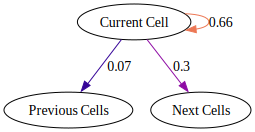

In [152]:
get_average_transition_graphs(task_transition_relations)[1]


### Task 2


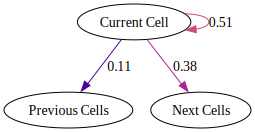

In [149]:
get_average_transition_graphs(task_transition_relations)[2]


# Transitions between events


In [165]:
event_transitions_df = processor.get_event_transitions(df_hack)
event_transitions_df

100%|██████████| 47/47 [00:00<00:00, 1454.89it/s]


,kernel_id,event_from,event_to
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,execute,finished_execute
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,finished_execute,save_notebook
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,save_notebook,execute
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,execute,finished_execute
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,finished_execute,execute
...,...,...,...
21918,f740b64e-0997-4bd5-bdd6-2b47c4251f71,finished_execute,execute
21919,f740b64e-0997-4bd5-bdd6-2b47c4251f71,execute,execute
21920,f740b64e-0997-4bd5-bdd6-2b47c4251f71,execute,finished_execute
21921,f740b64e-0997-4bd5-bdd6-2b47c4251f71,finished_execute,finished_execute


In [169]:
merge_columns = ['user_id', 'kernel_id', 'expert', 'notebook_name']
event_transitions_merged = df_hack[merge_columns].drop_duplicates(keep='last').merge(event_transitions_df,
                                                                                     on='kernel_id')

event_transitions_merged['task_type'] = event_transitions_merged.notebook_name.apply(
    lambda x: 1 if 'task1' in x else (2 if "task2" in x else 1)
)

SEP = "_"
event_transitions_merged[
    'transition_type'] = event_transitions_merged.event_from + SEP + event_transitions_merged.event_to

event_transitions_merged.head()



,user_id,kernel_id,expert,notebook_name,event_from,event_to,task_type,transition_type
0,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,save_notebook,execute,1,save_notebook_execute
1,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,execute,create,1,execute_create
2,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,create,finished_execute,1,create_finished_execute
3,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,finished_execute,execute,1,finished_execute_execute
4,4,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,False,task1.ipynb,execute,finished_execute,1,execute_finished_execute


In [177]:
task_event_transition_relations = event_transitions_merged.groupby(
    ["task_type", 'user_id'], as_index=False
) \
    .transition_type.value_counts(normalize=True) \
    .groupby(["task_type", 'transition_type'], as_index=False).proportion.mean()

task_event_transition_relations


,task_type,transition_type,proportion
0,1,create_create,0.031338
1,1,create_delete,0.004007
2,1,create_error,0.002859
3,1,create_execute,0.030050
4,1,create_finished_execute,0.016352
...,...,...,...
148,2,to_markdown_create,0.000296
149,2,to_markdown_finished_execute,0.000644
150,2,to_markdown_rendered,0.001732
151,2,to_other_create,0.004695


In [171]:
# labels = list(task_event_transition_relations.event_from.unique())
labels = ['create', 'execute', 'delete',
          'kernel_interrupting', 'kernel_restarting']
labels_idx_mapping = {v: k for k, v in enumerate(labels)}
labels_idx_mapping


{'create': 0,
 'execute': 1,
 'delete': 2,
 'kernel_interrupting': 3,
 'kernel_restarting': 4}

In [181]:
data = []
tm = task_event_transition_relations[['transition_type', 'proportion']].set_index('transition_type').to_dict()[
    'proportion']
for l1 in labels:
    for l2 in labels:
        if f"{l1}_{l2}" in tm:
            data.append((labels_idx_mapping[l1], labels_idx_mapping[l2], tm[f"{l1}_{l2}"]))

source, target, value = np.array(data).T

In [185]:
idx_color_mapping = {
    0: '#F5B19C',
    1: "#5C9090",
    2: "#E9B666",
    3: "#BFD0CA",
    4: "#A5B2B5",
}
colors = [idx_color_mapping[i] for i in source]


In [186]:
import plotly.graph_objects as go

np.random.seed(42)
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node={"label": labels, 'pad': 50},
    link={
        "source": source, "target": target, "value": value,
        "color": colors}
))

fig.show()
